# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 12 - Zum Ziegenproblem

<br>Zum Ziegen- oder 3-Türen-Problem siehe auch<br>
<br>
G. von Randow &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Elemente der Mathematik &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; G. Grigerenzer<br>
Das Ziegenproblem &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Leistungskurs Stochastik &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Das Einmaleins der Skepsis<br>
Rowohlt 1992/2004 &nbsp;&nbsp;&nbsp;&nbsp;	Schroedel Verlag 2003 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Berliner Taschenbuchverlag 2004<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;S. 74-75
<br><br>
Jemand nimmt an einer Spielshow im Fernsehen teil, bei der er eine von drei ver-<br>
schlossenen Türen auswählen soll. Hinter einer Tür wartet der Preis, ein Auto, hin-<br>
ter den beiden anderen stehen Ziegen. Der Spieler zeigt auf eine Tür, etwa Num- <br>
mer eins. Sie bleibt vorerst verschlossen. Der Spielleiter weiß, hinter welcher Tür<br>
sich das Auto befindet; mit den Worten "Ich zeige Ihnen mal was" öffnet er eine <br> 
andere Tür, z.B. Nummer drei, und eine meckernde Ziege schaut ins Publikum. Er <br>
fragt: "Bleiben Sie bei Nummer eins oder wählen Sie Nummer zwei"?
<br><br>
Die Frage ist allgemein:  Welche Strategie ist die bessere
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$:  Der Spieler bleibt bei der ursprünglichen Auswahl<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$:  Er wechselt zu der Tür, die der Spielleiter nicht geöffnet hat?
<br><br>
Die Antwort ist
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Strategie $B$ ist besser, da die Gewinnwahrscheinlichkeit $2/3$ beträgt;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;bei Strategie $A$ ist sie nur $1/3$
<br><br>
(Das Spiel wird unter den Annahmen betrachtet, dass 1) der Spielleiter weder die<br>
Tür, hinter der das Auto steht, noch die vom Spieler gewählte Tür öffnen darf; <br>
2) dass die Möglichkeit zum Wechseln immer gegeben wird; 3) dass der Spielleiter<br>
[unter Beachtung von 1)] seine weiteren Entscheidungen absolut zufällig trifft ein-<br>schließlich der Entscheidung, hinter welcher Tür das Auto versteckt wird)
<br>

In [1]:
%run zufall/start

Das ZufallsExperiment ist 3-stufig
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Stufe 1 - das Auto (A) wird hinter einer Tür versteckt<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Stufe 2 - der Spieler (S) wählt eine Tür<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Stufe 3 - der Spielleiter (L) wählt und öffnet eine Tür<br>
<br>
Es wird über seine vollständige Liste erzeugt

In [2]:
A1, A2, A3, S1, S2, S3, L1, L2, L3 = symbols('A1, A2, A3, S1, S2, S3, L1, L2, L3')
p1, p2 = Rational(1, 3), Rational(1, 2)

In [3]:

ziegenProblem = \
      ZE( [ (A1, p1), [ (S1, p1),  [ (L2, p2), (L3, p2) ],   
                         (S2, p1),  [ (L3, 1) ],             
                         (S3, p1),  [ (L2, 1) ]              
                       ],                                    
            (A2, p1), [ (S1, p1),  [ (L3, 1) ],              
                         (S2, p1),  [ (L1, p2), (L3, p2) ],  
                         (S3, p1),  [ (L1, 1) ]              
                       ],                                        
            (A3, p1), [ (S1, p1),  [ (L2, 1) ],                
                         (S2, p1),  [ (L1, 1) ],               
                         (S3, p1),  [ (L1, p2), (L2, p2) ]    
                       ]                                      
          ] )                                                   


Damit ist das <b>Baumdiagramm</b>

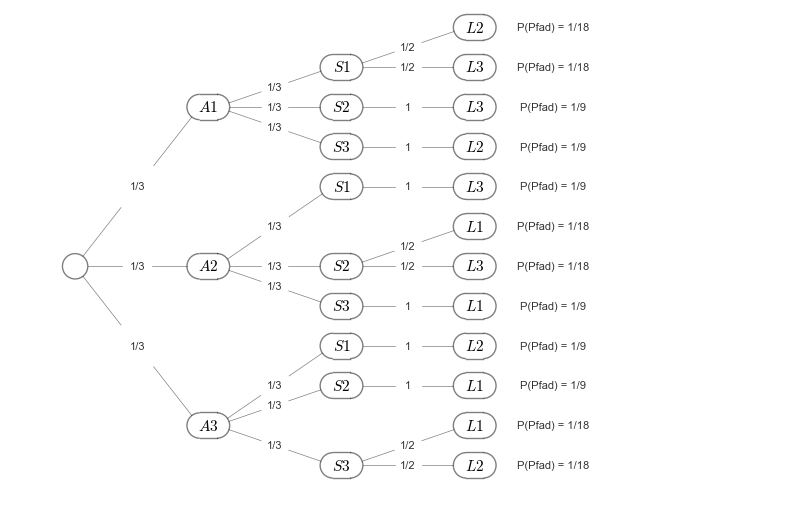

In [4]:
ziegenProblem.baum

Bei der Strategie A sind die Gewinnpfade diejenigen, bei denen der Spieler <br>
die richtige Tür auswählt, bei der Strategie B die übrigen
<br><br>
Das ergibt die <b>Gewinnwahrscheinlichkeiten</b> bei den beiden Strategien
<br><br>
$P_A = 6 \cdot \frac{1}{18} = \mathbf{\dfrac{1}{3}}$
<br><br>
$P_B = 6 \cdot \frac{1}{9} = \mathbf{\dfrac{2}{3}}$  

Die <b>Veränderung der Gewinnwahrscheinlichkeiten</b> durch das Öffnen der <br>
Tür durch den Spielleiter kann formal mit dem <b>Satz von Bayes</b> nachgewiesen <br> 
werden<br>
<br>
Es wird angenommen, dass der Spieler Tür 1 gewählt und der Spielleiter Tür 2 <br>
geöffnet haben (die anderen Situationen sind analog). Das reduzierte Baumdiagramm <br>
wird über das entsprechende ZufallsExperiment gewonnen

In [5]:
reduziert_S1 = ZE( [ (A1, p1), [ (L2, p2), (L3, p2) ],                                                   
                     (A2, p1), [ (L3, 1) ],                         
                     (A3, p1), [ (L2, 1) ] ] )                                                

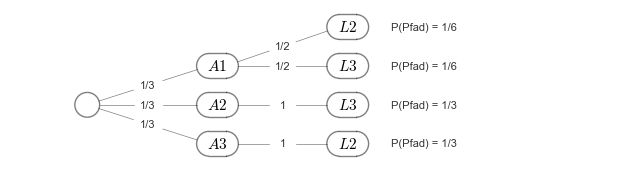

In [6]:
reduziert_S1.baum

An diesem Baum können folgende bedingte Wahrscheinlichkeiten bestimmt werden <br>
(  $P_B(A) = P( A\, |\, B)$  )

<div style='font-family:roman; font-size:120%'>
$P_{L_2}(A_1) = \dfrac{P(A_1 \cap L_2)}{P(L_2)} =  \dfrac{P(A_1 \cap L_2)}{P(A_1 \cap L_2) + P(A_3 \cap L_2) } =
\dfrac{P(A_1) \cdot P_{A_1}(L_2)}{P(A_1) \cdot P_{A_1}(L_2) + P(A_3) \cdot P_{A_3}(L_2)}$ <br>
$ \qquad\quad = \dfrac{\frac{1}{3}\cdot \frac{1}{2}}{\frac{1}{3}\cdot \frac{1}{2} + 1\cdot \frac{1}{3}} = 
\mathbf{\dfrac{1}{3}} \qquad $ 
(entspricht Strategie <b>A</b>)
<br><br>

$P_{L_2}(A_3) = \dfrac{P(A_3 \cap L_2)}{P(L_2)} =  \dfrac{P(A_3 \cap L_2)}{P(A_1 \cap L_2) + P(A_3 \cap L_2) } =
\dfrac{P(A_3) \cdot P_{A_3}(L_2)}{P(A_1) \cdot P_{A_1}(L_2) + P(A_3) \cdot P_{A_3}(L_2)}$ <br>
$ \qquad\quad = \dfrac{\frac{1}{3}\cdot 1}{\frac{1}{3}\cdot \frac{1}{2} + 1\cdot \frac{1}{3}} = 
\mathbf{\dfrac{2}{3}} \qquad$
(entspricht Strategie <b>B</b>)
<br><br>
</div>

Zur <b>Simulation des Spiels</b> können folgende Prozeduren verwendet werden  
(s.a. von Randow, S. 166)
<h4>Ein  einzelnes Spiel</h4>

In [7]:

def spiel():
    
    auto = zuf_zahl((1, 3))         # die Tür mit dem Auto    ( Zufallszahl 1, 2 oder 3 )
    spieler = zuf_zahl((1, 3))      # die vom Spieler gewählte Tür    
    frei = {1, 2, 3}.difference({auto, spieler})
                                    # eine oder zwei Türen für den Spielleiter
                                    # (er darf weder die Auto- noch die gewählte Tür öffnen)    
    if spieler != auto:
        gewinnA = 'verloren'        # Strategie A: verloren
        leiter = frei.pop()         # die Tür für den Spielleiter (frei hat ein Element)
    else:                       
        gewinnA = 'gewonnen'        # Strategie A: gewonnen
        nr = zuf_zahl((0, 1))       # zufällige Wahl eines Index  (frei hat zwei Elemente)    
        leiter = list(frei)[nr]  
        
    wechsel = 6 - spieler - leiter  # zu dieser Tür kann gewechselt werden 
                                    # (es gilt immer spieler + leiter + wechsel = 6)    
    if wechsel == auto: 
        gewinnB = 'gewonnen'        # Strategie B: gewonnen
    else:
        gewinnB = 'verloren'        # Strategie B: verloren
        
    print("\n                     Strategie A        Strategie B");
    print("Auto    " + str(auto) + ".Tür")
    print("Spieler " + str(spieler) + ".Tür")
    print("Leiter  " + str(leiter) + ".Tür")
    print("                     kein Wechsel", "      Wechsel zur " +str(wechsel) + ".Tür")
    print("                    ", gewinnA, "         ", gewinnB, "\n")  
    

In [10]:
spiel()   # kann mehrfach ausgeführt werden


                     Strategie A        Strategie B
Auto    2.Tuer
Spieler 2.Tuer
Leiter  1.Tuer
                     kein Wechsel       Wechsel zur 3.Tuer
                     gewonnen           verloren 



<h4>Eine Spielserie</h4>

In [11]:

def spielSerie(anzahl):

    gewinneA, gewinneB = 0, 0     # Anzahl der Gewinnspiele bei Strategie A bzw. B
    for i in range(anzahl):
        auto = zuf_zahl((1, 3))   
        spieler = zuf_zahl((1, 3))
        frei = {1, 2, 3}.difference({auto, spieler})                                                              
        if spieler != auto:
            leiter = frei.pop()                                   
        else:
            gewinneA += 1
            nr = zuf_zahl((1, 2))                   
            leiter = frei.pop()
        wechsel = 6 - spieler - leiter               
        if wechsel == auto: 
            gewinneB += 1
    fa = 'Strategie A:  Gewonnen{0:7} Spiele    rel.H. = {1:.4f}   theor.W. = 0.3333'
    fb = 'Strategie B:  Gewonnen{0:7} Spiele    rel.H. = {1:.4f}   theor.W. = 0.6666'
    print(' ')
    print(fa.format(gewinneA, gewinneA/anzahl))
    print(fb.format(gewinneB, gewinneB/anzahl))
    print(' ')

In [14]:
spielSerie(50000)    # mehrfach ausführen, Anzahl variieren

 
Strategie A:  Gewonnen  16780 Spiele    rel.H. = 0.3356   theor.W. = 0.3333
Strategie B:  Gewonnen  33220 Spiele    rel.H. = 0.6644   theor.W. = 0.6666
 
